In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer

In [2]:
pd.set_option('display.max_colwidth', -1)

# Gathering Data

#### Source 1: Twitter Archive CSV file

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Source 2: Image Predictions TSV file

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open ('image_predictions-3.tsv' ,'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions-3.tsv', sep='\t')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Source 3: Tweets Data

In [9]:
consumer_key = 'mCrx42FWNNSKB7c0PsR3ASKsJ'
consumer_secret = 'Fwq3wCpMbDrkJsxO9mAbW5YBIIEuJBwxBC9hi1zY7ioGBYdKoa'
access_token = '1382458752-k9AVrIV60pQYej1iGgHdFCv3q9pM9GRZiNVS4Fo'
access_secret = 'U6xaElosMyHduYHWPplSS9IlVmKpQYC9fvcBClhfo5VmE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [10]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
       # count += 1
        # print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [12]:
tweet_counts = []

with open('tweet_json.txt') as file:
    for line in file:
        tweet  = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_counts.append({'tweet_id': int(tweet_id),
                                        'retweet_count': int(retweet_count),
                                        'favorite_count': int(favorite_count)})

In [13]:
tweet_data = pd.DataFrame(tweet_counts, columns = ['tweet_id','retweet_count','favorite_count'])

In [14]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8219,37720
1,892177421306343426,6077,32385
2,891815181378084864,4020,24389
3,891689557279858688,8373,41033
4,891327558926688256,9079,39227


In [15]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [16]:
# Create a csv file of tweet_data
tweet_data.to_csv('tweet_data', index = False)

# Assessing Data

#### Visial Assessment

In [17]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8219,37720
1,892177421306343426,6077,32385
2,891815181378084864,4020,24389
3,891689557279858688,8373,41033
4,891327558926688256,9079,39227
5,891087950875897856,3011,19718
6,890971913173991426,1989,11530
7,890729181411237888,18264,63595
8,890609185150312448,4136,27098
9,890240255349198849,7140,31085


In [22]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Programmatic Assessment

##### Names

In [23]:
twitter_archive['name'].value_counts()

None           745
a              55 
Charlie        12 
Lucy           11 
Cooper         11 
Oliver         11 
Lola           10 
Penny          10 
Tucker         10 
Winston        9  
Bo             9  
Sadie          8  
the            8  
an             7  
Daisy          7  
Toby           7  
Bailey         7  
Buddy          7  
Bella          6  
Scout          6  
Stanley        6  
Jax            6  
Rusty          6  
Jack           6  
Milo           6  
Leo            6  
Dave           6  
Koda           6  
Oscar          6  
Sammy          5  
              ..  
Arya           1  
Chevy          1  
Shakespeare    1  
Rolf           1  
Bubba          1  
Trevith        1  
Dallas         1  
Rascal         1  
Benny          1  
Combo          1  
Jessiga        1  
Bert           1  
Chubbs         1  
Chloe          1  
Hero           1  
Alejandro      1  
Rudy           1  
Mitch          1  
Clarkus        1  
Rooney         1  
Aqua           1  
Dietrich    

In [24]:
twitter_archive[twitter_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

##### Dog Stage

In [25]:
twitter_archive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [26]:
twitter_archive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [27]:
twitter_archive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [28]:
twitter_archive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

##### Rating

In [29]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [30]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

## Quality Issues

##### twitter_archive dataset:

1) data in 'timestamp' column should be datetime instead of object. data in tweet_id should be string instead of integer.

2) data in columns 'in_reply_to_status_id' and 'in_reply_to_user_id' don't make sense and doen't provide any relevant information.

3) data in name column looks to have incorrect names (745 names are "none" and 55 names are "a", etc.). All lowercase names appear to be incorrect.

4) data contains retweets, which should be removed from the dataset.

5) some values in the rating_numerator and rating_denominator columns were incorrectly captured from the tweets.

6) the doggo, floofer, pupper, and puppo columns use 'None' as variables instead of Nan values.

##### image_predictions dataset:

7) The datatype in tweet_id is integer but should be stored as string.

##### tweet_data dataset:

8) The datatype in tweet_id is integer but should be stored as string.

## Tidiness Issues

1) The dog stage is currently split into four separate columns. We can present this data in one column instead.

2) Merge image_predictions, twitter_archive, and tweet_data into one table.

# Cleaning Data

In [31]:
# make copies of datasets for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Quality: data in 'timestamp' column should be datetime instead of object. data in tweet_id should be string instead of integer.

##### Define: 
Convert timestamp from string to datetime series. Convert tweet_id to string using .astype() function

##### Code:

In [32]:
#change timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [33]:
#change tweet_id to string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str) 

##### Test:

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Quality: Data in columns 'in_reply_to_status_id' and 'in_reply_to_user_id' don't make sense and doesn't provide any relevant information. (2)

##### Define:

Drop the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns since it does not provide relevant useful information.

##### Code:

In [35]:
#dropping columns we do not need
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

##### Test:

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Quality: data in name column looks to have incorrect names ("none", "a", etc.) (3)

##### Define:
create a list of incorrect names and use the replace function to change these to NaN value.

##### Code:

In [37]:
#creating list of incorrect names by filtering by any value that is lower case since those are incorrect names
incorrect_names=list(twitter_archive_clean[twitter_archive_clean.name.str.islower()==True].name.unique())

In [38]:
#replace names in list wtih NaN value
for name in incorrect_names:
    twitter_archive_clean.name.replace(name,np.nan, inplace=True)

In [39]:
#replace names 'None' wtih NaN value
twitter_archive_clean.name.replace('None',np.nan, inplace=True)

##### Test:

In [40]:
twitter_archive_clean.name.value_counts()

Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston        9 
Bo             9 
Sadie          8 
Toby           7 
Buddy          7 
Bailey         7 
Daisy          7 
Stanley        6 
Scout          6 
Jack           6 
Oscar          6 
Rusty          6 
Jax            6 
Bella          6 
Koda           6 
Milo           6 
Leo            6 
Dave           6 
Larry          5 
Phil           5 
Sunny          5 
Oakley         5 
Gus            5 
              .. 
Binky          1 
Arya           1 
Chevy          1 
Shakespeare    1 
Rolf           1 
Bubba          1 
Rinna          1 
Trevith        1 
Dallas         1 
Rooney         1 
Jessiga        1 
Bert           1 
Chubbs         1 
Chloe          1 
Hero           1 
Alejandro      1 
Rudy           1 
Mack           1 
Mitch          1 
Benny          1 
Clarkus        1 
Aqua           1 
Dietrich       1 
Staniel        1 
Willem    

### Quality: Data contains retweets, which should be removed from the dataset. (4)

##### Define:

Remove retweets and only keep original tweets.

##### Code:

In [41]:
#drop tweets that are assigned a retweeted_status_id
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull() == True ].index, inplace=True)

In [42]:
#drop the retweeted columns since there is no data in them anymore
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test:

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Quality: some values in the rating_numerator and rating_denominator columns were incorrectly captured from the tweets. (5)

##### Define:
Find the entries where the incorrect rating_denominator does not equal 10 and change the value to 10.

##### Code:

In [44]:
#assigning a value of 10 to the rating_denominator variable to create a standard 10 point rating system using 10 as the denominator
twitter_archive_clean.rating_denominator = 10

##### Test:

In [45]:
twitter_archive_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

##### Define:

Create a list of tweets where the numerator is greater than 20 since the rating scale can intentionally go above 10 however going over 20 is more likely due to an error in the dataset. Then inspect the tweet text and look for the correct rating and change as needed.

##### Code:

In [46]:
#counting how many entries have rating over 20
print(twitter_archive_clean['text'][twitter_archive_clean.rating_numerator > 20].count())

#creating a list of those entries
twitter_archive_clean[['tweet_id','text','rating_numerator']][twitter_archive_clean.rating_numerator > 20]

23


,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,838150277551247360,@markhoppus 182/10,182
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776


###### list of entries to change the rating numerator:

313 - picked up wrong number, change to 13

433 - rating is multiplied by 7, change to 12

516 - no rating given in text, remove this entry

695 - numerators do not account for float, change numerators to float and change to 9.75

763 - numerators do not account for float, change numerators to float and change to 11.27

902 - rating is multiplied by 15, change to 11

1120 - rating multiplied by 17, change to 12

1202 - incorrect rating, change to 11

1228 - rating is multiplied by 9, change to 11

1254 - rating is multiplied by 8, change to 10

1274 - rating is multiplied by 5, change to 9

1351 - rating is multiplied by 5, change to 12

1433 - rating is multiplied by 4, change to 11

1634 - rating is multiplied by 13, change to 11

1635 - rating is multiplied by 11, change to 11

1712 - numerators do not account for float, change numerators to float and change to 11.26

1779 - rating is multiplied by 12, change to 12

1843 - rating is multiplied by 8, change to 11


In [47]:
# change datatype to float to account for decimals in rating
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [48]:
# changing to correct rating numerator from text
twitter_archive_clean.loc[313, 'rating_numerator'] = 13
twitter_archive_clean.loc[433, 'rating_numerator'] = 12
twitter_archive_clean.loc[695, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[763, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[902, 'rating_numerator'] = 11
twitter_archive_clean.loc[1120, 'rating_numerator'] = 12
twitter_archive_clean.loc[1202, 'rating_numerator'] = 11
twitter_archive_clean.loc[1228, 'rating_numerator'] = 11
twitter_archive_clean.loc[1254, 'rating_numerator'] = 10
twitter_archive_clean.loc[1274, 'rating_numerator'] = 9
twitter_archive_clean.loc[1351, 'rating_numerator'] = 12
twitter_archive_clean.loc[1433, 'rating_numerator'] = 11
twitter_archive_clean.loc[1634, 'rating_numerator'] = 11
twitter_archive_clean.loc[1635, 'rating_numerator'] = 11
twitter_archive_clean.loc[1712, 'rating_numerator'] = 11.26
twitter_archive_clean.loc[1779, 'rating_numerator'] = 12
twitter_archive_clean.loc[1843, 'rating_numerator'] = 11

##### Test:

In [49]:
twitter_archive_clean[['tweet_id','text','rating_numerator']][twitter_archive_clean.rating_numerator > 20]

,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0
290,838150277551247360,@markhoppus 182/10,182.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0


##### Define:
The remaning ratings over 20 were given intentionally, however I would considered these entries as outliers so I will remove the from the dataframe.

##### Code:

In [50]:
#removing the outliers
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator < 20]

##### Test:

In [51]:
print(twitter_archive_clean['text'][twitter_archive_clean.rating_numerator > 20].count())

0


### Quality: the datatype in tweet_id column in the image_predictions is integer but should be stored as string. (7)

##### Define:
 use pandas .astype() function to change tweet_id to string

##### Code:

In [52]:
#change tweet_id to string
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str) 

##### Test:

In [53]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality: the datatype in tweet_id column in the tweet_data is integer but should be stored as string. (8)

##### Define:
 use pandas .astype() function to change tweet_id to string

##### Code:

In [54]:
#change tweet_id to string
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str) 

##### Test:

In [55]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


### Quality: the doggo, floofer, pupper, and puppo columns use 'None' as variables instead of Nan values.
### Tidiness: The dog stage is currently split into four separate columns. We can present this data in one column instead. (1)

##### Define:
Convert doggo, pupper, puppo and floofer to one categorical variable and display this data in a single column. Then change the 'none' values to NaN values. Some tweets have multiple dog stages so in those instances I will use "multiple" as the dog_stage variable. Once the new 'dog_stage' column has been made, then I will drop the 'doggo', 'floofer', 'pupper', 'puppo' columns to tidy up the dataframe.

##### Code:

In [56]:
#merging all the 4 columns together to create 1 single variable in a new column 'dog_stage'
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)

In [57]:
#checking newly created variables in the 'dog_stage' column that I created above
twitter_archive_clean.dog_stage.value_counts()

NoneNoneNoneNone        1824
NoneNonepupperNone      224 
doggoNoneNoneNone       75  
NoneNoneNonepuppo       24  
doggoNonepupperNone     10  
NoneflooferNoneNone     9   
doggoNoneNonepuppo      1   
doggoflooferNoneNone    1   
Name: dog_stage, dtype: int64

In [58]:
#fixing a quality issue by replacing the true 'none' values with NaN value
#coreccting the newly created variables to display the correct dog stage
#if multiple dog stages are assigned then change the variavle to 'multiple'

twitter_archive_clean.dog_stage.replace('NoneNoneNoneNone',np.nan, inplace=True)
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'NoneNonepupperNone'] = 'pupper'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'doggoNoneNoneNone'] = 'doggo'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'NoneNoneNonepuppo'] = 'puppo'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'NoneflooferNoneNone'] = 'floofer'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'doggoNonepupperNone'] = 'multiple'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'doggoflooferNoneNone'] = 'multiple'
twitter_archive_clean.dog_stage.loc[twitter_archive_clean.dog_stage == 'doggoNoneNonepuppo'] = 'multiple'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
# dropping the old columns since they are now irrelevant
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)

##### Test:

In [60]:
twitter_archive_clean.dog_stage.value_counts()

pupper      224
doggo       75 
puppo       24 
multiple    12 
floofer     9  
Name: dog_stage, dtype: int64

In [61]:
twitter_archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo


In [62]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN


In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2168 non-null object
timestamp             2168 non-null datetime64[ns]
source                2168 non-null object
text                  2168 non-null object
expanded_urls         2114 non-null object
rating_numerator      2168 non-null float64
rating_denominator    2168 non-null int64
name                  1389 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 169.4+ KB


In [64]:
twitter_archive_clean.dog_stage.value_counts()

pupper      224
doggo       75 
puppo       24 
multiple    12 
floofer     9  
Name: dog_stage, dtype: int64

### Tidiness: Merge image_predictions, twitter_archive, and tweet_data into one table. (2)

#### Define: 
merge dataframes into one table on tweet_id

##### Code:

In [65]:
#merging all the clean dataframes in to one table
df_merge =pd.merge(twitter_archive_clean,image_predictions_clean, on='tweet_id', how='left')

In [66]:
df_merge =pd.merge(df_merge,tweet_data_clean, on='tweet_id', how='left')

##### Test:

In [67]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8219.0,37720.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6077.0,32385.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4020.0,24389.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8373.0,41033.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9079.0,39227.0


## Storing dataset

In [68]:
df_merge.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Insights

### 1) Most popular dog breed by number of tweets

In [69]:
# create a list for the top 10 most frequently tweeted breeds
top_10_breeds = df_merge.p1.value_counts().head(10)
top_10_breeds

golden_retriever      138
Labrador_retriever    95 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               40 
Pomeranian            38 
toy_poodle            38 
malamute              29 
Name: p1, dtype: int64

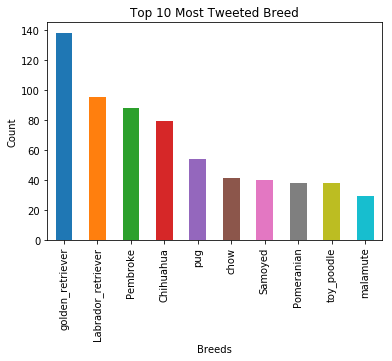

In [70]:
# create a bar chart to display to top 10 breeds
plt.title('Top 10 Most Tweeted Breed')
plt.ylabel('Count')
plt.xlabel('Breeds')
top_10_breeds.plot(kind='bar');

Here I created a bar chart that displays the top 10 tweeted breeds (using the image predictions algorithm. The above visualization shows how many times the each of the top 10 breeds appeared in the dataset. We can see that the Golder Retriever is the most tweeted breed with over 130 tweets. The other most tweeted breeds are the Labrador Retriever, Pembroke, Chihuahua, Pug, Chow, Samoyed, Toy Poodle, Pomeranian, and Malamute.

### 2) Retweet count vs Rating

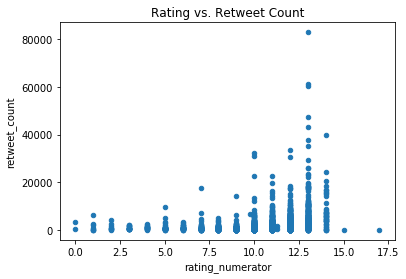

In [71]:
#creating scatter plot to show relationship between rating and retweet_count
df_merge.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.title('Rating vs. Retweet Count');

Here I created a scatterplot that displays the ‘retweet_count’ column and the ‘numerator_rating’ column for each entry in the dataset. We can see that there is a positive relationship between the two variables. As the rating_numerator increases the retweet_count also increases which makes sense as we should expect higher rated dogs to be shared more often on social media in this case it was shared through retweets. Although we can see some outliers with the entries that have a rating_numerator of 15 and 17.5 that have low retweet counts.

### 3) Most popular dog name

In [72]:
top_10_names = df_merge.name.value_counts().head(10)
top_10_names

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny      9 
Tucker     9 
Lola       8 
Sadie      8 
Winston    8 
Toby       7 
Name: name, dtype: int64

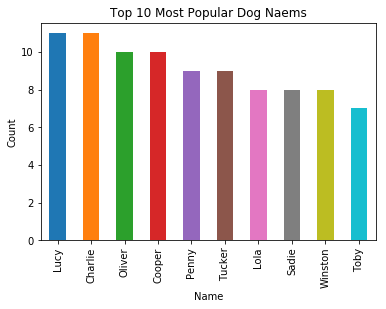

In [73]:
plt.title('Top 10 Most Popular Dog Naems')
plt.ylabel('Count')
plt.xlabel('Name')
top_10_names.plot(kind='bar');

My last analysis investigated the most common dog name in the dataset.  I displayed my findings in the above bar chart that shows the name and the count of how many times the name appeared in the data set. The top 10 dog names in the data set were Lucy, Charlie, Cooper, Oliver, Penny, Tucker, Sadie, Lola, Winston, and Toby. We can see that there are quite a few ties. For example, Lucy and Charlie have tied for 1st place, Oliver and Cooper are tied for 2nd place, and Penny and Tuckey are tied for 3rd place.